In [168]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [169]:
import tensorflow as tf

tf.test.gpu_device_name()

''

In [170]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [171]:
import os

In [172]:
from sklearn.metrics import confusion_matrix

## Load data ##

In [110]:
train_dir = 'data/train'
validation_dir = 'data/validation'
test_dir = 'data/test'

In [111]:
train_damaged_dir = os.path.join(train_dir, 'damaged')  # directory with our training damaged pictures
train_undamaged_dir = os.path.join(train_dir, 'undamaged')  # directory with our training undamaged pictures
validation_damaged_dir = os.path.join(validation_dir, 'damaged')  # directory with our validation damaged pictures
validation_undamaged_dir = os.path.join(validation_dir, 'undamaged')  # directory with our validation undamaged pictures
test_damaged_dir = os.path.join(test_dir, 'damaged')  # directory with our test damaged pictures
test_undamaged_dir = os.path.join(test_dir, 'undamaged')  # directory with our test undamaged pictures


## Understand the data ##

### Let's look at how many damaged and undamaged images are in the training and validation directory: ###

In [112]:
num_damaged_tr = len(os.listdir(train_damaged_dir))
num_undamaged_tr = len(os.listdir(train_undamaged_dir))

num_damaged_val = len(os.listdir(validation_damaged_dir))
num_undamaged_val = len(os.listdir(validation_undamaged_dir))

num_damaged_ts = len(os.listdir(test_damaged_dir))
num_undamaged_ts = len(os.listdir(test_undamaged_dir))

total_train = num_damaged_tr + num_undamaged_tr
total_val = num_damaged_val + num_undamaged_val
total_test = num_damaged_ts + num_undamaged_ts

In [113]:
print('total training damaged images:', num_damaged_tr)
print('total training undamaged images:', num_undamaged_tr)

print('total validation damaged images:', num_damaged_val)
print('total validation undamaged images:', num_undamaged_val)

print('total test damaged images:', num_damaged_ts)
print('total test undamaged images:', num_undamaged_ts)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)
print("Total test images:", total_test)

total training damaged images: 821
total training undamaged images: 547
total validation damaged images: 273
total validation undamaged images: 183
total test damaged images: 274
total test undamaged images: 182
--
Total training images: 1368
Total validation images: 456
Total test images: 456


In [557]:
# set up variables
batch_size = 128
#epochs = 5
#IMG_HEIGHT = 150
#IMG_WIDTH = 150

# VGG19, VGG16, Inception
#IMG_HEIGHT = 224
#IMG_WIDTH = 224

# inceptionV3
#IMG_HEIGHT = 299
#IMG_WIDTH = 299


IMG_HEIGHT = 331
IMG_WIDTH = 331

## Data preparation ##

In [558]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data
test_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our test data

In [559]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 1368 images belonging to 2 classes.


In [560]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 456 images belonging to 2 classes.


In [561]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=test_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 456 images belonging to 2 classes.


## Visualize training images ##

In [421]:
sample_training_images, _ = next(train_data_gen)

In [504]:
sample_training_images, labels = next(train_data_gen)

In [505]:
labels

array([0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [448]:
sample_training_images, labels = next(train_data_gen)

In [453]:
labels

array([0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 1.], dtype=float32)

In [422]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

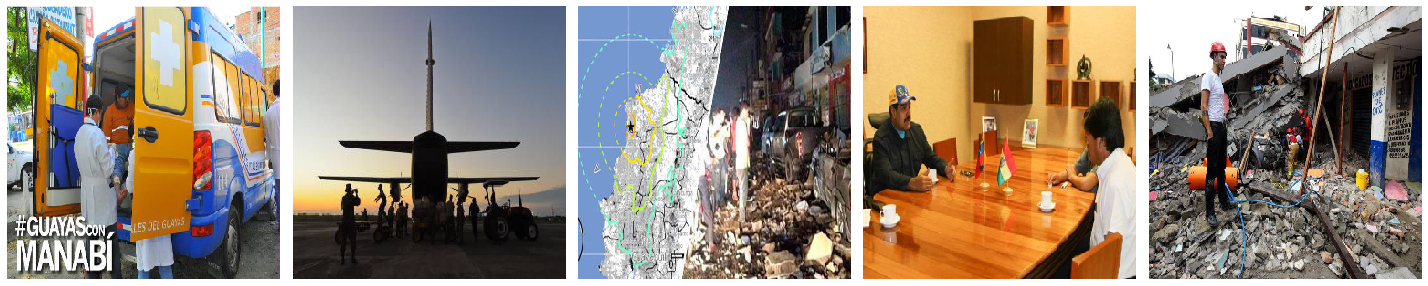

In [423]:
plotImages(sample_training_images[:5])

In [625]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(40,40))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      #plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.title(label_batch[n], fontdict={'fontsize':28})
      plt.axis('off')

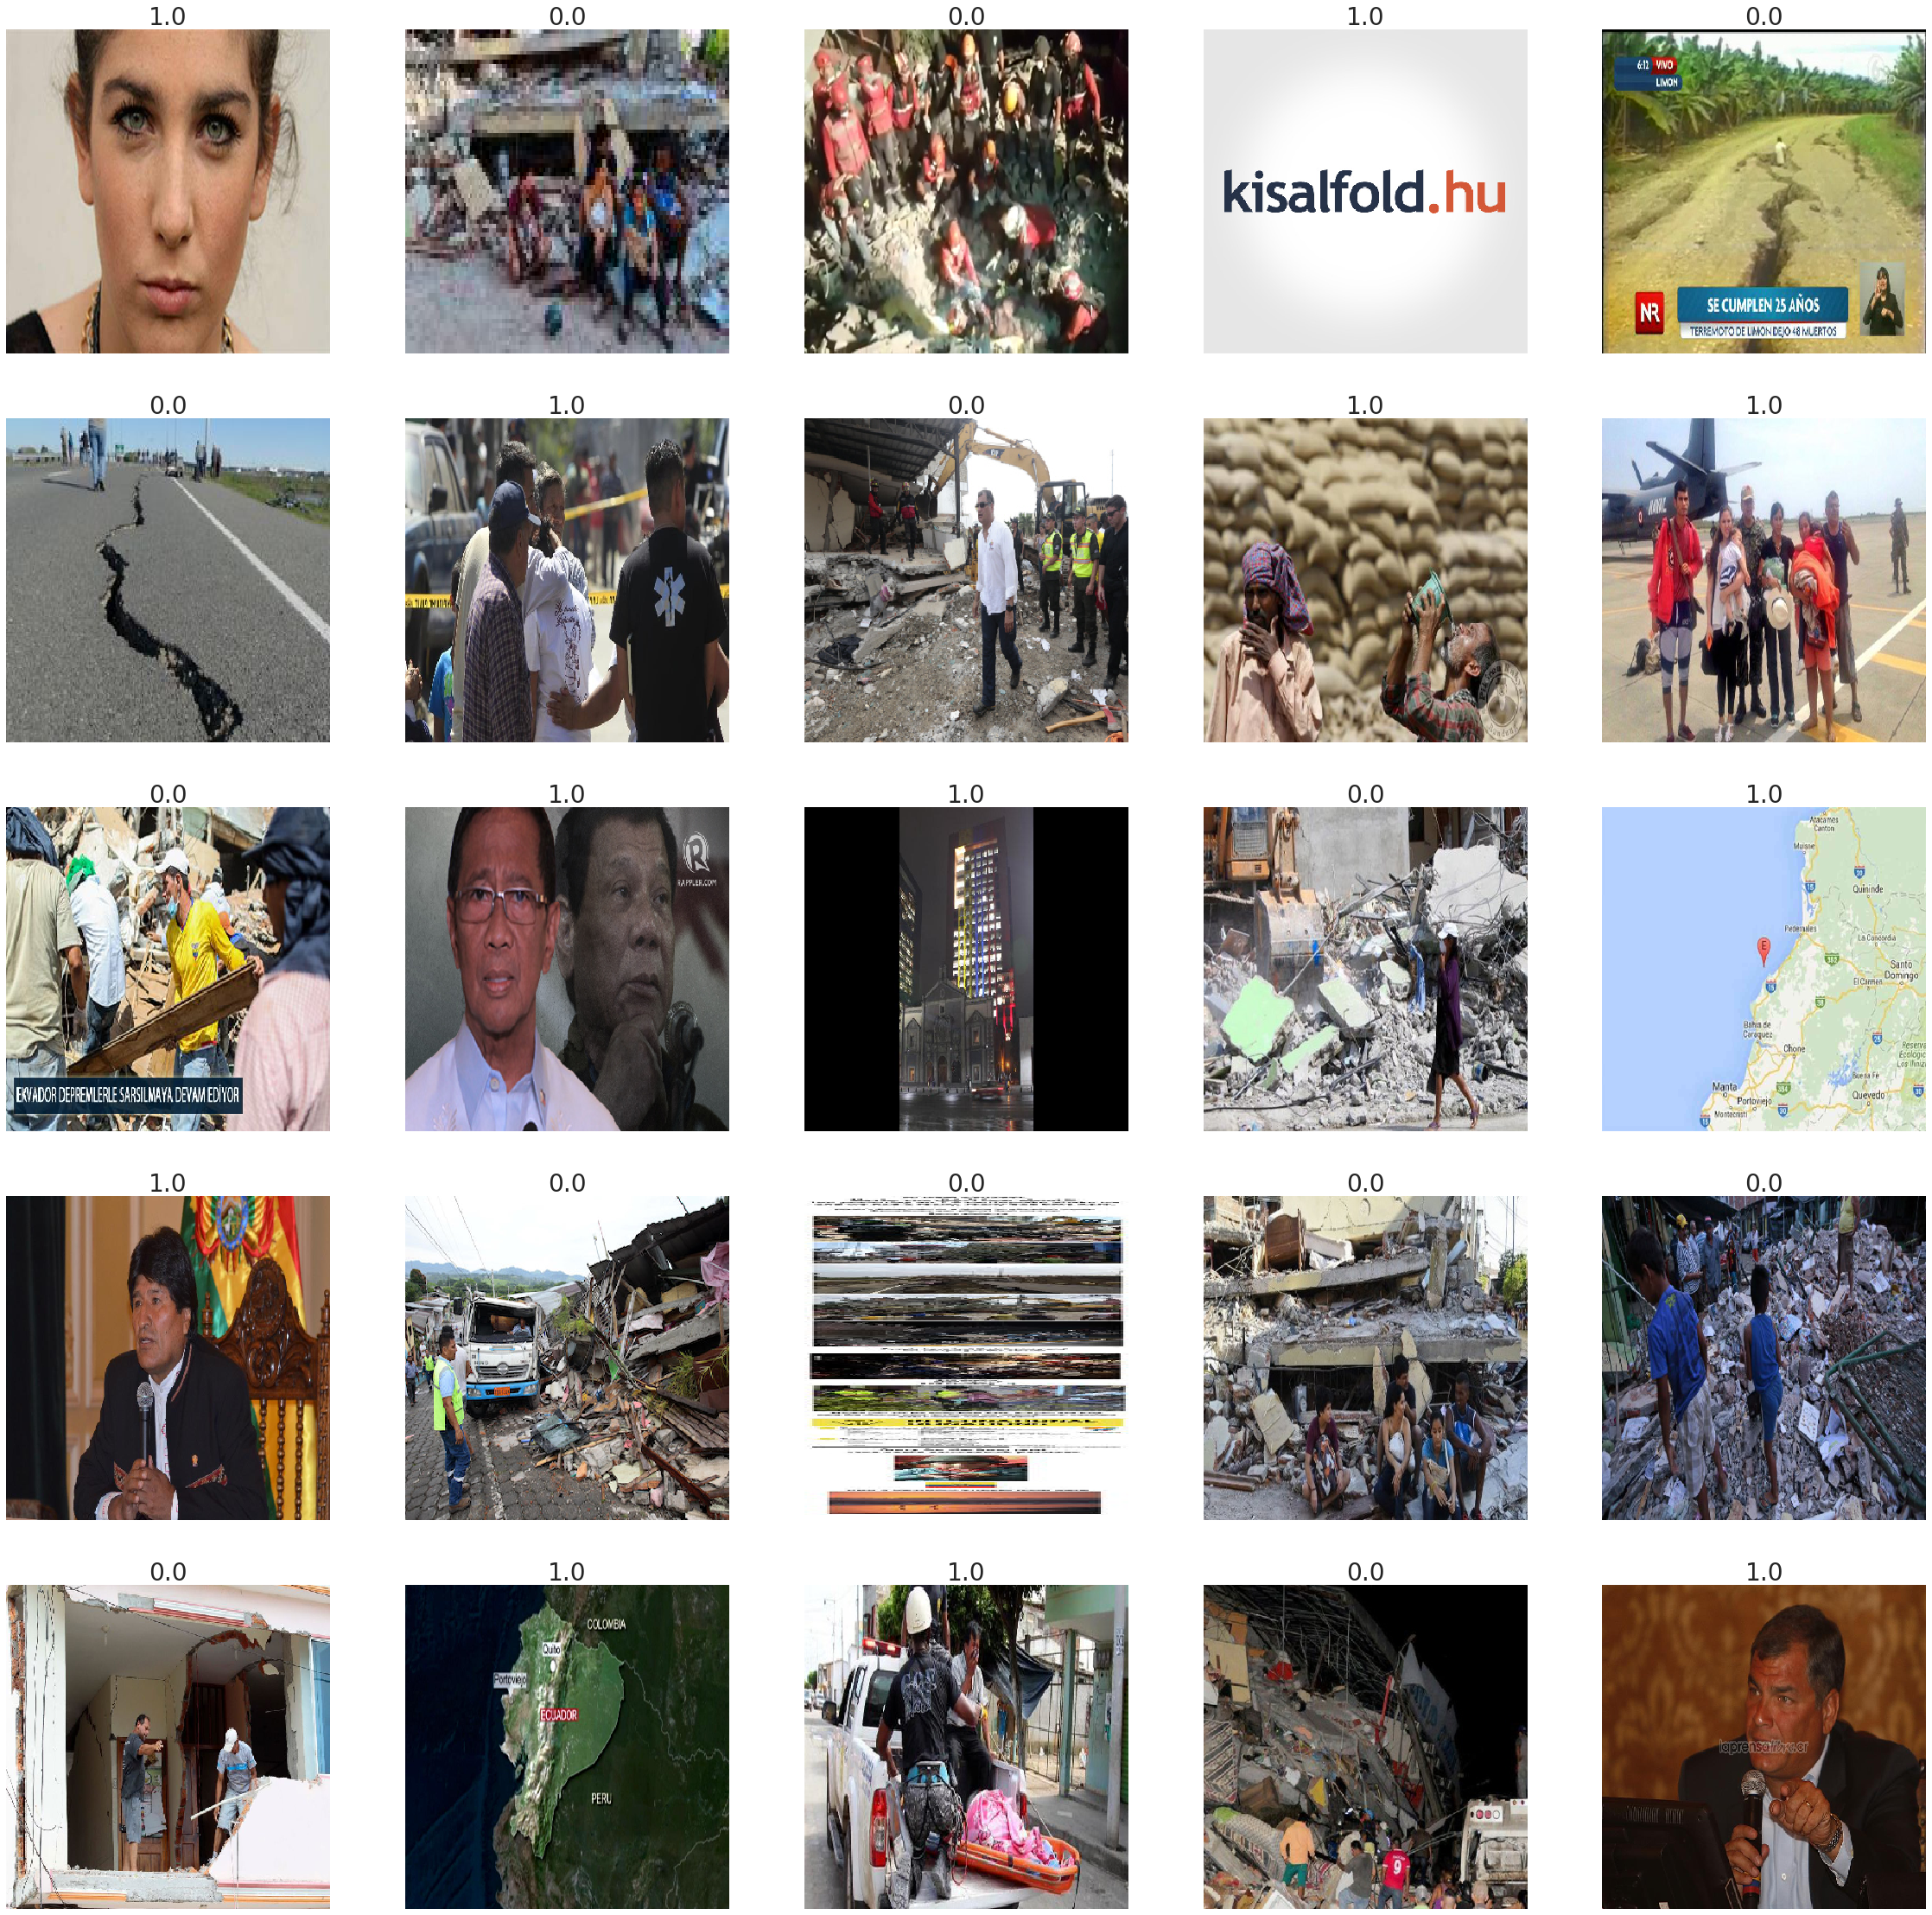

In [626]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

In [591]:
#train_data_gen.classes[:50]

In [466]:
label_batch

array([0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 0.], dtype=float32)

## Create the model ##

In [177]:
model_1 = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])

## Compile the model ##

In [185]:
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Model summary ##

In [186]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 20736)            

## Train the model_1 ##

In [187]:
history = model_1.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=15,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
10/10 [==============================] - 13s 1s/step - loss: 1.5040 - acc: 0.5419 - val_loss: 0.6852 - val_acc: 0.5885
Epoch 2/15
10/10 [==============================] - 15s 1s/step - loss: 0.6757 - acc: 0.6274 - val_loss: 0.6560 - val_acc: 0.6042
Epoch 3/15
10/10 [==============================] - 12s 1s/step - loss: 0.6109 - acc: 0.6734 - val_loss: 0.6043 - val_acc: 0.6771
Epoch 4/15
10/10 [==============================] - 11s 1s/step - loss: 0.5322 - acc: 0.7452 - val_loss: 0.4957 - val_acc: 0.7734
Epoch 5/15
10/10 [==============================] - 11s 1s/step - loss: 0.4642 - acc: 0.7750 - val_loss: 0.5113 - val_acc: 0.7578
Epoch 6/15
10/10 [==============================] - 11s 1s/step - loss: 0.4260 - acc: 0.8158 - val_loss: 0.4945 - val_acc: 0.7865
Epoch 7/15
10/10 [==============================] - 11s 1s/step - loss: 0.3378 - acc: 0.8641 - val_loss: 0.4638 - val_acc: 0.7734
Epoch 8/15
10/10 [==============================] - 10s 1s/step - loss: 0.3102 - acc: 0.89

In [592]:
# Save the entire model to a HDF5 file
model_1.save('Model_1/model_1.h5')

## Visualize the training results ##

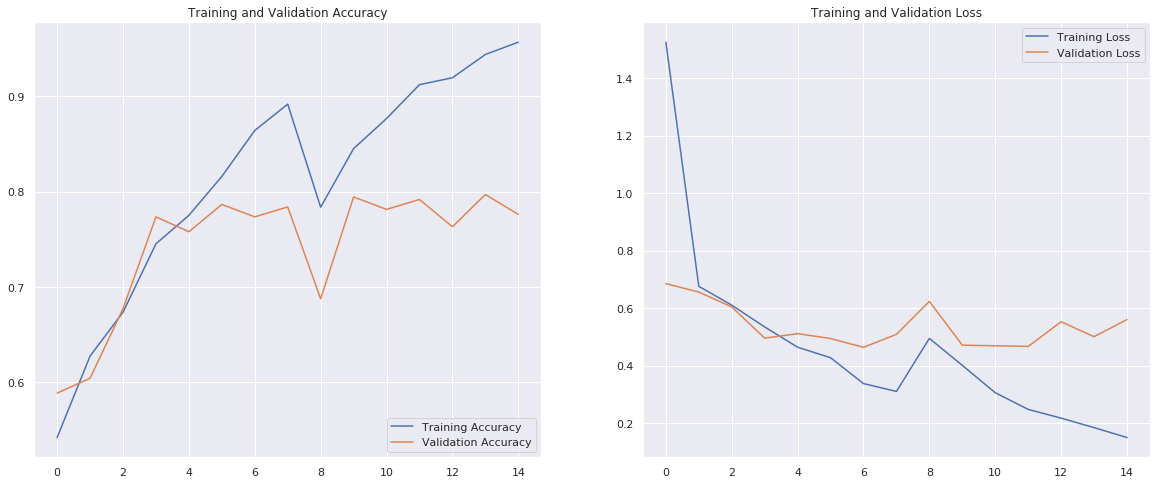

In [242]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Evaluate accuracy on test data ##

### Let's compare how the model performs on the test dataset ###

In [189]:
test_loss, test_acc = model_1.evaluate_generator(test_data_gen, verbose=0)

In [190]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8004386


In [191]:
print('\nTest loss:', test_loss)


Test loss: 0.4354972243309021


## Make predictions on test data ##

### Let's make predictions on some images ###

In [497]:
test_data_gen.class_indices

{'damaged': 0, 'undamaged': 1}

In [506]:
predictions = model_1.predict_generator(test_data_gen)

In [507]:
true_labels = test_data_gen.classes

In [508]:
predictions[0]

array([0.00730955, 0.9926905 ], dtype=float32)

In [509]:
np.argmax(predictions[0])

1

In [510]:
test_data_gen.classes[0]

0

In [512]:
len(test_data_gen.classes)

456

In [513]:
len(predictions)

456

In [199]:
#np.argmax(predictions[0])

In [200]:
predictions[-1]

array([0.86958915, 0.13041088], dtype=float32)

In [201]:
np.argmax(predictions[-1])

0

In [202]:
test_data_gen.classes[-1]

1

In [203]:
#np.argmax(predictions[-1])

In [476]:
test_data_gen.target_size

(299, 299)

In [477]:
test_data_gen

In [204]:
test_data_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Confusion Matrix ##

In [514]:
y_true = true_labels
y_pred = np.array([np.argmax(x) for x in predictions])

In [515]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [516]:
cm = confusion_matrix(y_true, y_pred)

In [517]:
print(cm)

[[182  92]
 [125  57]]


## Classification report on test set ##

In [518]:
from sklearn.metrics import classification_report

In [519]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.66      0.63       274
           1       0.38      0.31      0.34       182

    accuracy                           0.52       456
   macro avg       0.49      0.49      0.49       456
weighted avg       0.51      0.52      0.51       456



In [268]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

## Using Pre-trained CNN model ##

In [214]:
base_model = InceptionV3(weights='imagenet', include_top=False)

In [215]:
#CLASSES = 2
#x = base_model.output
#x = GlobalAveragePooling2D(name='avg_pool')(x)
#x = Dropout(0.4)(x)
#predictions = Dense(CLASSES, activation='softmax')(x)
#model_inception_v3 = Model(inputs=base_model.input, outputs=predictions)

In [216]:
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(2, activation='softmax')(x)

# this is the model we will train
model_inceptionV3 = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model_inceptionV3.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [217]:
# train the model on the new data for a few epochs
#model.fit_generator(...)

In [218]:
history_2 = model_inceptionV3.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=15,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
10/10 [==============================] - 21s 2s/step - loss: 2.6981 - acc: 0.5720 - val_loss: 0.5110 - val_acc: 0.7552
Epoch 2/15
10/10 [==============================] - 18s 2s/step - loss: 0.6429 - acc: 0.7087 - val_loss: 0.7939 - val_acc: 0.6677
Epoch 3/15
10/10 [==============================] - 16s 2s/step - loss: 0.5950 - acc: 0.7242 - val_loss: 1.6834 - val_acc: 0.4360
Epoch 4/15
10/10 [==============================] - 15s 2s/step - loss: 0.5215 - acc: 0.7617 - val_loss: 1.0814 - val_acc: 0.5305
Epoch 5/15
10/10 [==============================] - 16s 2s/step - loss: 0.4471 - acc: 0.7767 - val_loss: 0.5237 - val_acc: 0.7682
Epoch 6/15
10/10 [==============================] - 16s 2s/step - loss: 0.5569 - acc: 0.7859 - val_loss: 0.7035 - val_acc: 0.6524
Epoch 7/15
10/10 [==============================] - 16s 2s/step - loss: 0.4266 - acc: 0.8305 - val_loss: 0.9188 - val_acc: 0.6524
Epoch 8/15
10/10 [==============================] - 15s 1s/step - loss: 0.3899 - acc: 0.83

## Visualize inceptionV3 model ##

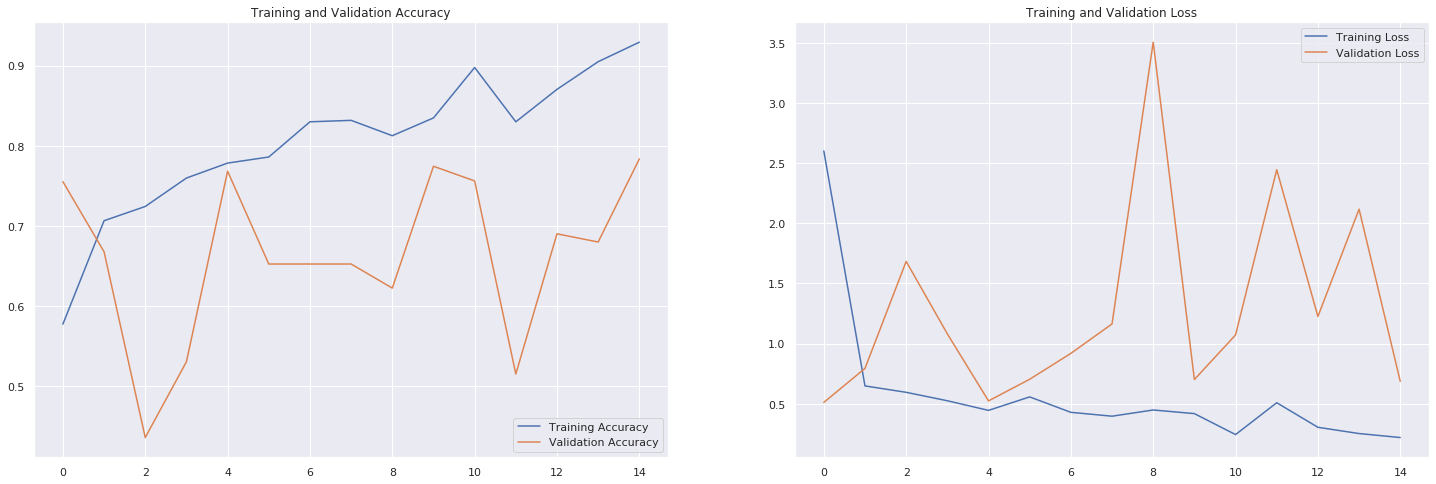

In [360]:
acc = history_2.history['acc']
val_acc = history_2.history['val_acc']

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [220]:


# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model_inceptionV3.layers[:249]:
   layer.trainable = False
for layer in model_inceptionV3.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
model_inceptionV3.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])



0 input_4
1 conv2d_283
2 batch_normalization_283
3 activation_283
4 conv2d_284
5 batch_normalization_284
6 activation_284
7 conv2d_285
8 batch_normalization_285
9 activation_285
10 max_pooling2d_13
11 conv2d_286
12 batch_normalization_286
13 activation_286
14 conv2d_287
15 batch_normalization_287
16 activation_287
17 max_pooling2d_14
18 conv2d_291
19 batch_normalization_291
20 activation_291
21 conv2d_289
22 conv2d_292
23 batch_normalization_289
24 batch_normalization_292
25 activation_289
26 activation_292
27 average_pooling2d_28
28 conv2d_288
29 conv2d_290
30 conv2d_293
31 conv2d_294
32 batch_normalization_288
33 batch_normalization_290
34 batch_normalization_293
35 batch_normalization_294
36 activation_288
37 activation_290
38 activation_293
39 activation_294
40 mixed0
41 conv2d_298
42 batch_normalization_298
43 activation_298
44 conv2d_296
45 conv2d_299
46 batch_normalization_296
47 batch_normalization_299
48 activation_296
49 activation_299
50 average_pooling2d_29
51 conv2d_295
52

In [221]:
# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
history_3 = model_inceptionV3.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=15,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
10/10 [==============================] - 27s 3s/step - loss: 0.1028 - acc: 0.9738 - val_loss: 0.7000 - val_acc: 0.7708
Epoch 2/15
10/10 [==============================] - 20s 2s/step - loss: 0.1096 - acc: 0.9705 - val_loss: 0.7369 - val_acc: 0.7591
Epoch 3/15
10/10 [==============================] - 20s 2s/step - loss: 0.1134 - acc: 0.9717 - val_loss: 0.7103 - val_acc: 0.7622
Epoch 4/15
10/10 [==============================] - 20s 2s/step - loss: 0.1085 - acc: 0.9723 - val_loss: 0.6656 - val_acc: 0.7774
Epoch 5/15
10/10 [==============================] - 21s 2s/step - loss: 0.1013 - acc: 0.9751 - val_loss: 0.6942 - val_acc: 0.7708
Epoch 6/15
10/10 [==============================] - 21s 2s/step - loss: 0.0996 - acc: 0.9758 - val_loss: 0.8257 - val_acc: 0.7561
Epoch 7/15
10/10 [==============================] - 20s 2s/step - loss: 0.0895 - acc: 0.9794 - val_loss: 0.5621 - val_acc: 0.7988
Epoch 8/15
10/10 [==============================] - 20s 2s/step - loss: 0.0920 - acc: 0.97

## Visualize inceptionV3 model again ##

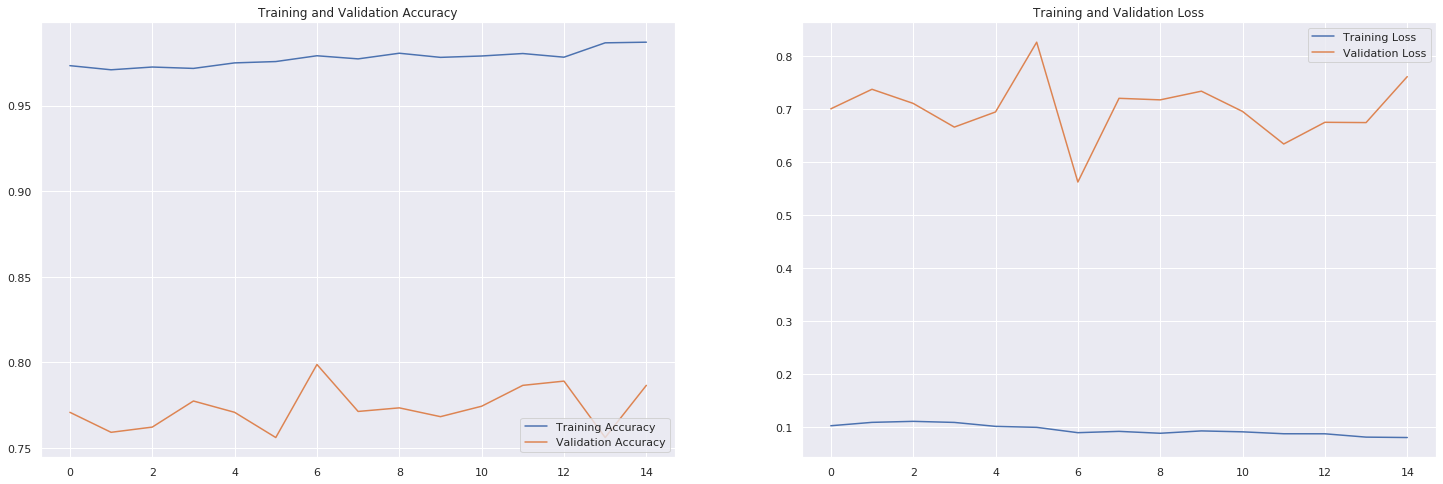

In [359]:
acc = history_3.history['acc']
val_acc = history_3.history['val_acc']

loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Evaluate inceptionV3 model accuracy on test data ##

### Let's compare how the model performs on the test dataset ###

In [243]:
test_loss, test_acc = model_inceptionV3.evaluate_generator(test_data_gen, verbose=0)

In [244]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.7653508730102003


In [245]:
print('\nTest loss:', test_loss)


Test loss: 0.702300837165431


## Make predictions on test data ##

### Let's make predictions on some images ###

In [246]:
test_data_gen.class_indices

{'damaged': 0, 'undamaged': 1}

In [247]:
predictions = model_inceptionV3.predict_generator(test_data_gen)

In [248]:
true_labels = test_data_gen.classes

In [249]:
predictions[0]

array([0.4147583 , 0.58524173], dtype=float32)

In [250]:
np.argmax(predictions[0])

1

In [251]:
test_data_gen.classes[0]

0

In [252]:
predictions[-1]

array([0.9985612 , 0.00143885], dtype=float32)

In [253]:
np.argmax(predictions[-1])

0

In [254]:
test_data_gen.classes[-1]

1

In [256]:
test_data_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Confusion Matrix ##

In [257]:
y_true = true_labels
y_pred = np.array([np.argmax(x) for x in predictions])

In [258]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [259]:
cm = confusion_matrix(y_true, y_pred)

In [260]:
print(cm)

[[157 117]
 [102  80]]


## Confusion Matrix Heat Map ##

In [261]:
#!pip install seaborn

In [262]:
#import seaborn as sb

In [263]:
#heat_map = sb.heatmap(cm, annot=True)
#sb.set(font_scale=1)
#plt.show()

## Classification report of inceptionV3 on test set ##

In [264]:
from sklearn.metrics import classification_report

In [265]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.57      0.59       274
           1       0.41      0.44      0.42       182

    accuracy                           0.52       456
   macro avg       0.51      0.51      0.51       456
weighted avg       0.53      0.52      0.52       456



## VGG19 Pre-trained model ##

In [304]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

In [305]:
base_model = VGG19(weights='imagenet')

In [306]:
# add a global spatial average pooling layer
x = base_model.output
#x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(2, activation='softmax')(x)

# this is the model we will train
model_VGG19 = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model_VGG19.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [307]:
history_VGG19 = model_VGG19.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=15,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
10/10 [==============================] - 205s 21s/step - loss: 0.6606 - acc: 0.6207 - val_loss: 0.6368 - val_acc: 0.6354
Epoch 2/15
10/10 [==============================] - 192s 19s/step - loss: 0.6261 - acc: 0.6611 - val_loss: 0.6257 - val_acc: 0.6372
Epoch 3/15
10/10 [==============================] - 193s 19s/step - loss: 0.6030 - acc: 0.7065 - val_loss: 0.5593 - val_acc: 0.7561
Epoch 4/15
10/10 [==============================] - 198s 20s/step - loss: 0.5838 - acc: 0.7359 - val_loss: 0.5721 - val_acc: 0.7104
Epoch 5/15
10/10 [==============================] - 198s 20s/step - loss: 0.5574 - acc: 0.7519 - val_loss: 0.5376 - val_acc: 0.7578
Epoch 6/15
10/10 [==============================] - 194s 19s/step - loss: 0.5444 - acc: 0.7582 - val_loss: 0.5044 - val_acc: 0.7805
Epoch 7/15
10/10 [==============================] - 194s 19s/step - loss: 0.5292 - acc: 0.7713 - val_loss: 0.5043 - val_acc: 0.7652
Epoch 8/15
10/10 [==============================] - 194s 19s/step - loss: 0.

## Visualize VGG19 model ##

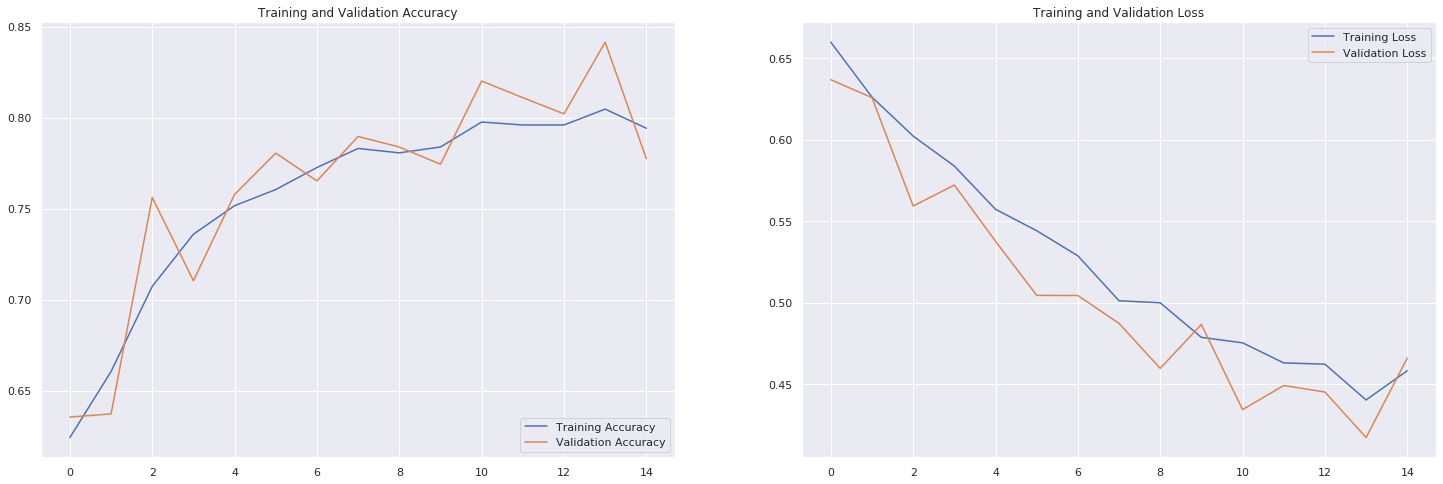

In [358]:
acc = history_VGG19.history['acc']
val_acc = history_VGG19.history['val_acc']

loss = history_VGG19.history['loss']
val_loss = history_VGG19.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Evaluation of VGG19 model accuracy on test data ##

### Let's compare how the model performs on the test dataset ###

In [309]:
test_loss, test_acc = model_VGG19.evaluate_generator(test_data_gen, verbose=0)

In [310]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.7916666687580577


In [311]:
print('\nTest loss:', test_loss)


Test loss: 0.457670586673837


## Make predictions on test data ##

### Let's make predictions on some images ###

In [312]:
test_data_gen.class_indices

{'damaged': 0, 'undamaged': 1}

In [313]:
predictions = model_VGG19.predict_generator(test_data_gen)

In [314]:
true_labels = test_data_gen.classes

In [315]:
predictions[0]

array([0.7784195 , 0.22158052], dtype=float32)

In [316]:
np.argmax(predictions[0])

0

In [317]:
test_data_gen.classes[0]

0

In [318]:
predictions[-1]

array([0.9064146 , 0.09358542], dtype=float32)

In [319]:
np.argmax(predictions[-1])

0

In [320]:
test_data_gen.classes[-1]

1

In [321]:
test_data_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Confusion Matrix ##

In [322]:
y_true = true_labels
y_pred = np.array([np.argmax(x) for x in predictions])

In [323]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,

In [324]:
cm = confusion_matrix(y_true, y_pred)

In [325]:
print(cm)

[[193  81]
 [128  54]]


## Confusion Matrix Heat Map ##

In [326]:
#!pip install seaborn

In [327]:
#import seaborn as sb

In [328]:
#heat_map = sb.heatmap(cm, annot=True)
#sb.set(font_scale=1)
#plt.show()

## Classification report of VGG19 on test set ##

In [329]:
from sklearn.metrics import classification_report

In [330]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.70      0.65       274
           1       0.40      0.30      0.34       182

    accuracy                           0.54       456
   macro avg       0.50      0.50      0.49       456
weighted avg       0.52      0.54      0.53       456



## ResNet50 Pre-trained model ##

In [331]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

In [332]:
base_model = ResNet50(weights='imagenet')

102858752/102853048 [==============================] - 22s 0us/step


In [333]:
# add a global spatial average pooling layer
x = base_model.output
#x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(2, activation='softmax')(x)

# this is the model we will train
model_ResNet = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model_ResNet.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [334]:
history_ResNet = model_ResNet.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=15,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
10/10 [==============================] - 77s 8s/step - loss: 0.6269 - acc: 0.6551 - val_loss: 0.6959 - val_acc: 0.4219
Epoch 2/15
10/10 [==============================] - 72s 7s/step - loss: 0.4962 - acc: 0.8098 - val_loss: 0.7798 - val_acc: 0.3902
Epoch 3/15
10/10 [==============================] - 74s 7s/step - loss: 0.4142 - acc: 0.8352 - val_loss: 0.8169 - val_acc: 0.4299
Epoch 4/15
10/10 [==============================] - 71s 7s/step - loss: 0.3629 - acc: 0.8511 - val_loss: 1.1220 - val_acc: 0.3811
Epoch 5/15
10/10 [==============================] - 76s 8s/step - loss: 0.3248 - acc: 0.8687 - val_loss: 1.2278 - val_acc: 0.3984
Epoch 6/15
10/10 [==============================] - 74s 7s/step - loss: 0.3061 - acc: 0.8725 - val_loss: 1.2259 - val_acc: 0.4146
Epoch 7/15
10/10 [==============================] - 76s 8s/step - loss: 0.2998 - acc: 0.8695 - val_loss: 1.4999 - val_acc: 0.3659
Epoch 8/15
10/10 [==============================] - 72s 7s/step - loss: 0.2908 - acc: 0.87

## Visualize ResNet50 model ##

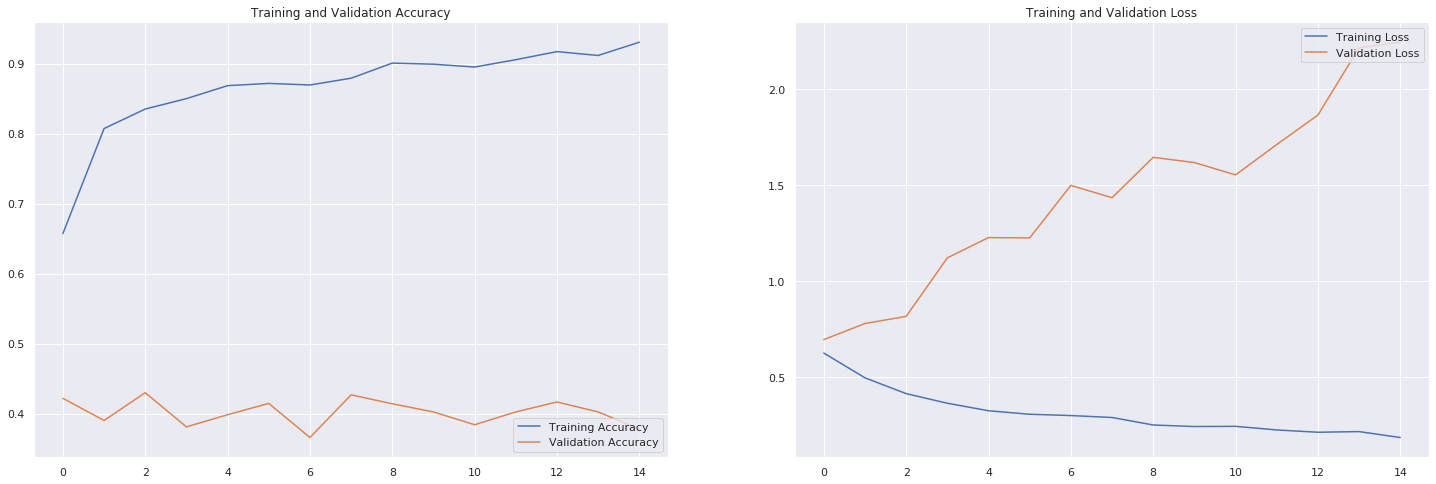

In [335]:
acc = history_ResNet.history['acc']
val_acc = history_ResNet.history['val_acc']

loss = history_ResNet.history['loss']
val_loss = history_ResNet.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Evaluation of ResNet50 model accuracy on test data ##

### Let's compare how the model performs on the test dataset ###

In [336]:
test_loss, test_acc = model_ResNet.evaluate_generator(test_data_gen, verbose=0)

In [337]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.3991228080632394


In [338]:
print('\nTest loss:', test_loss)


Test loss: 2.160103174678066


## Make predictions on test data ##

### Let's make predictions on some images ###

In [339]:
test_data_gen.class_indices

{'damaged': 0, 'undamaged': 1}

In [340]:
predictions = model_ResNet.predict_generator(test_data_gen)

In [341]:
true_labels = test_data_gen.classes

In [342]:
predictions[0]

array([0.02443513, 0.97556484], dtype=float32)

In [343]:
np.argmax(predictions[0])

1

In [344]:
test_data_gen.classes[0]

0

In [345]:
predictions[-1]

array([0.02691713, 0.9730829 ], dtype=float32)

In [346]:
np.argmax(predictions[-1])

1

In [347]:
test_data_gen.classes[-1]

1

In [348]:
test_data_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Confusion Matrix ##

In [349]:
y_true = true_labels
y_pred = np.array([np.argmax(x) for x in predictions])

In [350]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [351]:
cm = confusion_matrix(y_true, y_pred)

In [352]:
print(cm)

[[  0 274]
 [  0 182]]


## Confusion Matrix Heat Map ##

In [353]:
#!pip install seaborn

In [354]:
#import seaborn as sb

In [355]:
#heat_map = sb.heatmap(cm, annot=True)
#sb.set(font_scale=1)
#plt.show()

## Classification report of ResNet50 on test set ##

In [356]:
from sklearn.metrics import classification_report

In [357]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       274
           1       0.40      1.00      0.57       182

    accuracy                           0.40       456
   macro avg       0.20      0.50      0.29       456
weighted avg       0.16      0.40      0.23       456



/home/demolakstate/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## InceptionResNetV2 Pre-trained model ##

In [ ]:
from tensorflow.python.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
......
MAGE_SIZE    = (299, 299)
......
net = InceptionResNetV2(include_top=False,
                        weights='imagenet',
                        input_tensor=None,
                        input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3))
......

In [399]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input

In [400]:
base_model = InceptionResNetV2(weights='imagenet')

225214464/225209952 [==============================] - 53s 0us/step


In [404]:
# add a global spatial average pooling layer
x = base_model.output
#x = Flatten()(x)
#x = Dropout(0.5)(x)
#x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='softmax', name='softmax')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(2, activation='softmax')(x)

# this is the model we will train
model_IncepResNet = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model_IncepResNet.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [424]:
history_IncepResNet = model_IncepResNet.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=15,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
10/10 [==============================] - 201s 20s/step - loss: 0.6894 - acc: 0.6008 - val_loss: 0.6874 - val_acc: 0.5911
Epoch 2/15
10/10 [==============================] - 181s 18s/step - loss: 0.6858 - acc: 0.5978 - val_loss: 0.6820 - val_acc: 0.6189
Epoch 3/15
10/10 [==============================] - 185s 18s/step - loss: 0.6821 - acc: 0.6073 - val_loss: 0.6862 - val_acc: 0.5671
Epoch 4/15
10/10 [==============================] - 190s 19s/step - loss: 0.6816 - acc: 0.5953 - val_loss: 0.6767 - val_acc: 0.6189
Epoch 5/15
10/10 [==============================] - 187s 19s/step - loss: 0.6779 - acc: 0.6066 - val_loss: 0.6813 - val_acc: 0.5833
Epoch 6/15
10/10 [==============================] - 191s 19s/step - loss: 0.6755 - acc: 0.6086 - val_loss: 0.6679 - val_acc: 0.6372
Epoch 7/15
10/10 [==============================] - 185s 18s/step - loss: 0.6798 - acc: 0.5855 - val_loss: 0.6817 - val_acc: 0.5762
Epoch 8/15
10/10 [==============================] - 186s 19s/step - loss: 0.

## Visualize InceptionResNetV2 model ##

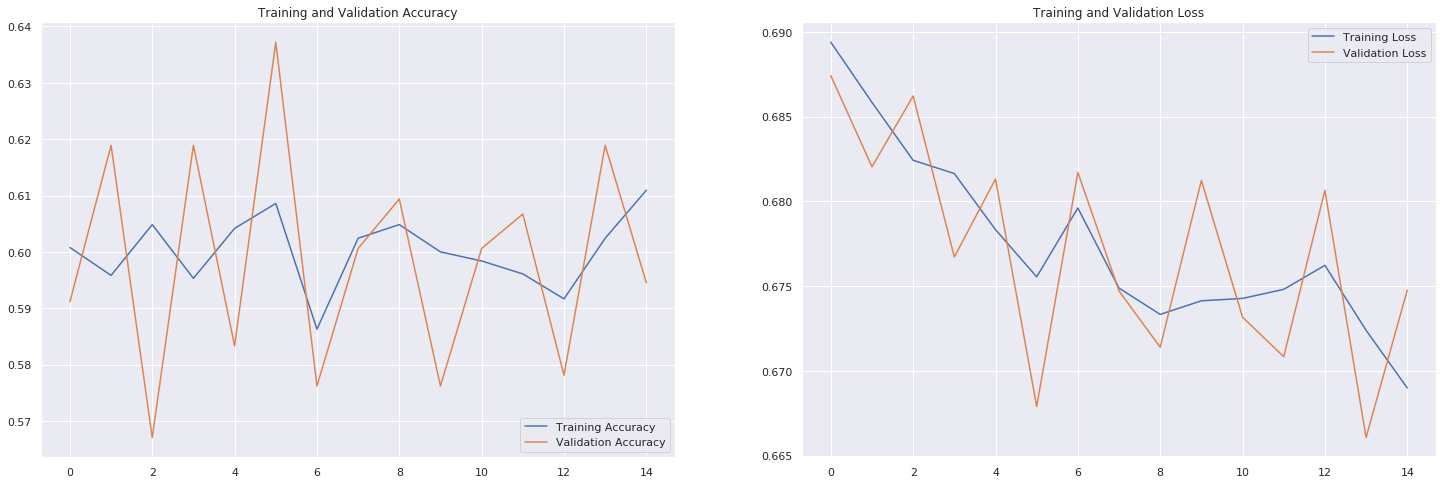

In [425]:
acc = history_IncepResNet.history['acc']
val_acc = history_IncepResNet.history['val_acc']

loss = history_IncepResNet.history['loss']
val_loss = history_IncepResNet.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Evaluation of InceptionResNetV2 model accuracy on test data ##

### Let's compare how the model performs on the test dataset ###

In [426]:
test_loss, test_acc = model_IncepResNet.evaluate_generator(test_data_gen, verbose=0)

In [427]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.6008771908910651


In [428]:
print('\nTest loss:', test_loss)


Test loss: 0.6723900489639818


## Make predictions on test data ##

### Let's make predictions on some images ###

In [429]:
test_data_gen.class_indices

{'damaged': 0, 'undamaged': 1}

In [430]:
predictions = model_IncepResNet.predict_generator(test_data_gen)

In [431]:
true_labels = test_data_gen.classes

In [432]:
predictions[0]

array([0.5928645 , 0.40713552], dtype=float32)

In [433]:
np.argmax(predictions[0])

0

In [434]:
test_data_gen.classes[0]

0

In [435]:
predictions[-1]

array([0.5936347, 0.4063653], dtype=float32)

In [436]:
np.argmax(predictions[-1])

0

In [437]:
test_data_gen.classes[-1]

1

In [438]:
test_data_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Confusion Matrix ##

In [439]:
y_true = true_labels
y_pred = np.array([np.argmax(x) for x in predictions])

In [440]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [441]:
cm = confusion_matrix(y_true, y_pred)

In [442]:
print(cm)

[[274   0]
 [182   0]]


## Confusion Matrix Heat Map ##

In [443]:
#!pip install seaborn

In [444]:
#import seaborn as sb

In [445]:
#heat_map = sb.heatmap(cm, annot=True)
#sb.set(font_scale=1)
#plt.show()

## Classification report of IncepResNetV2 on test set ##

In [446]:
from sklearn.metrics import classification_report

In [447]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       274
           1       0.00      0.00      0.00       182

    accuracy                           0.60       456
   macro avg       0.30      0.50      0.38       456
weighted avg       0.36      0.60      0.45       456



/home/demolakstate/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## VGG16 Pre-trained model ##

In [372]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

In [373]:
base_model = VGG16(weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 13s 0us/step


In [374]:
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(2, activation='softmax')(x)

# this is the model we will train
model_VGG16 = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model_VGG16.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [375]:
history_VGG16 = model_VGG16.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=15,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
10/10 [==============================] - 176s 18s/step - loss: 0.9475 - acc: 0.5623 - val_loss: 0.4596 - val_acc: 0.7760
Epoch 2/15
10/10 [==============================] - 156s 16s/step - loss: 0.4646 - acc: 0.7827 - val_loss: 0.3899 - val_acc: 0.8659
Epoch 3/15
10/10 [==============================] - 159s 16s/step - loss: 0.4365 - acc: 0.8102 - val_loss: 0.4128 - val_acc: 0.8354
Epoch 4/15
10/10 [==============================] - 152s 15s/step - loss: 0.3955 - acc: 0.8240 - val_loss: 0.5045 - val_acc: 0.7439
Epoch 5/15
10/10 [==============================] - 161s 16s/step - loss: 0.3446 - acc: 0.8443 - val_loss: 0.3978 - val_acc: 0.8307
Epoch 6/15
10/10 [==============================] - 158s 16s/step - loss: 0.3740 - acc: 0.8306 - val_loss: 0.2755 - val_acc: 0.9055
Epoch 7/15
10/10 [==============================] - 164s 16s/step - loss: 0.3423 - acc: 0.8516 - val_loss: 0.2917 - val_acc: 0.8841
Epoch 8/15
10/10 [==============================] - 159s 16s/step - loss: 0.

## Visualize VGG16 model ##

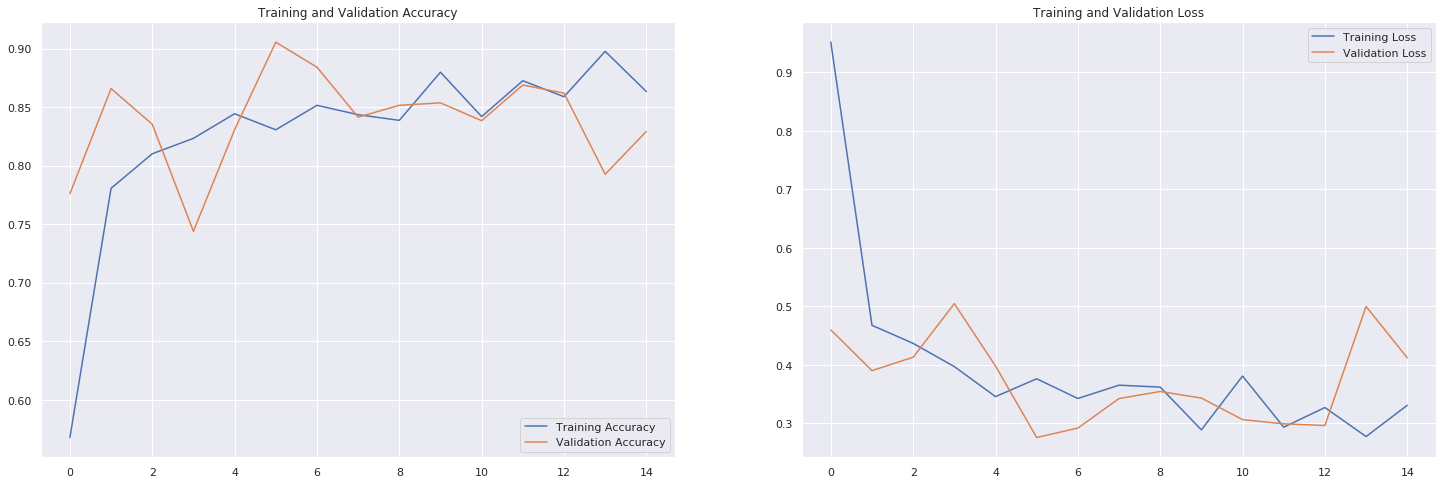

In [376]:
acc = history_VGG16.history['acc']
val_acc = history_VGG16.history['val_acc']

loss = history_VGG16.history['loss']
val_loss = history_VGG16.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Evaluation of VGG16 model accuracy on test data ##

### Let's compare how the model performs on the test dataset ###

In [377]:
test_loss, test_acc = model_VGG16.evaluate_generator(test_data_gen, verbose=0)

In [378]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8421052621121992


In [379]:
print('\nTest loss:', test_loss)


Test loss: 0.38792610795874344


## Make predictions on test data ##

### Let's make predictions on some images ###

In [380]:
test_data_gen.class_indices

{'damaged': 0, 'undamaged': 1}

In [381]:
predictions = model_VGG16.predict_generator(test_data_gen)

In [382]:
true_labels = test_data_gen.classes

In [383]:
predictions[0]

array([0.00438295, 0.99561703], dtype=float32)

In [384]:
np.argmax(predictions[0])

1

In [385]:
test_data_gen.classes[0]

0

In [386]:
predictions[-1]

array([0.95167845, 0.04832154], dtype=float32)

In [387]:
np.argmax(predictions[-1])

0

In [388]:
test_data_gen.classes[-1]

1

In [389]:
test_data_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Confusion Matrix ##

In [390]:
y_true = true_labels
y_pred = np.array([np.argmax(x) for x in predictions])

In [391]:
y_pred

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,

In [392]:
cm = confusion_matrix(y_true, y_pred)

In [393]:
print(cm)

[[134 140]
 [ 86  96]]


## Confusion Matrix Heat Map ##

In [394]:
#!pip install seaborn

In [395]:
#import seaborn as sb

In [396]:
#heat_map = sb.heatmap(cm, annot=True)
#sb.set(font_scale=1)
#plt.show()

## Classification report of VGG16 on test set ##

In [397]:
from sklearn.metrics import classification_report

In [398]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.49      0.54       274
           1       0.41      0.53      0.46       182

    accuracy                           0.50       456
   macro avg       0.51      0.51      0.50       456
weighted avg       0.53      0.50      0.51       456



## DenseNet121 Pre-trained model ##

In [526]:
from keras.applications.densenet import DenseNet121
from keras.preprocessing import image
from keras.applications.densenet import preprocess_input

In [527]:
base_model = DenseNet121(weights='imagenet', include_top=False)

29089792/29084464 [==============================] - 7s 0us/step


In [528]:
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(2, activation='softmax')(x)

# this is the model we will train
model_DN121 = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model_DN121.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [529]:
history_DN121 = model_DN121.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=15,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
10/10 [==============================] - 48s 5s/step - loss: 2.9640 - acc: 0.6226 - val_loss: 0.9884 - val_acc: 0.7266
Epoch 2/15
10/10 [==============================] - 34s 3s/step - loss: 0.4696 - acc: 0.8110 - val_loss: 0.4396 - val_acc: 0.8445
Epoch 3/15
10/10 [==============================] - 35s 3s/step - loss: 0.3949 - acc: 0.8219 - val_loss: 0.5422 - val_acc: 0.8049
Epoch 4/15
10/10 [==============================] - 33s 3s/step - loss: 0.2467 - acc: 0.9024 - val_loss: 0.8872 - val_acc: 0.7470
Epoch 5/15
10/10 [==============================] - 35s 4s/step - loss: 0.4537 - acc: 0.8175 - val_loss: 0.4103 - val_acc: 0.8490
Epoch 6/15
10/10 [==============================] - 34s 3s/step - loss: 0.1904 - acc: 0.9232 - val_loss: 2.0763 - val_acc: 0.6463
Epoch 7/15
10/10 [==============================] - 34s 3s/step - loss: 0.2864 - acc: 0.8904 - val_loss: 0.5326 - val_acc: 0.8171
Epoch 8/15
10/10 [==============================] - 35s 3s/step - loss: 0.2033 - acc: 0.92

## Visualize DenseNet121 model ##

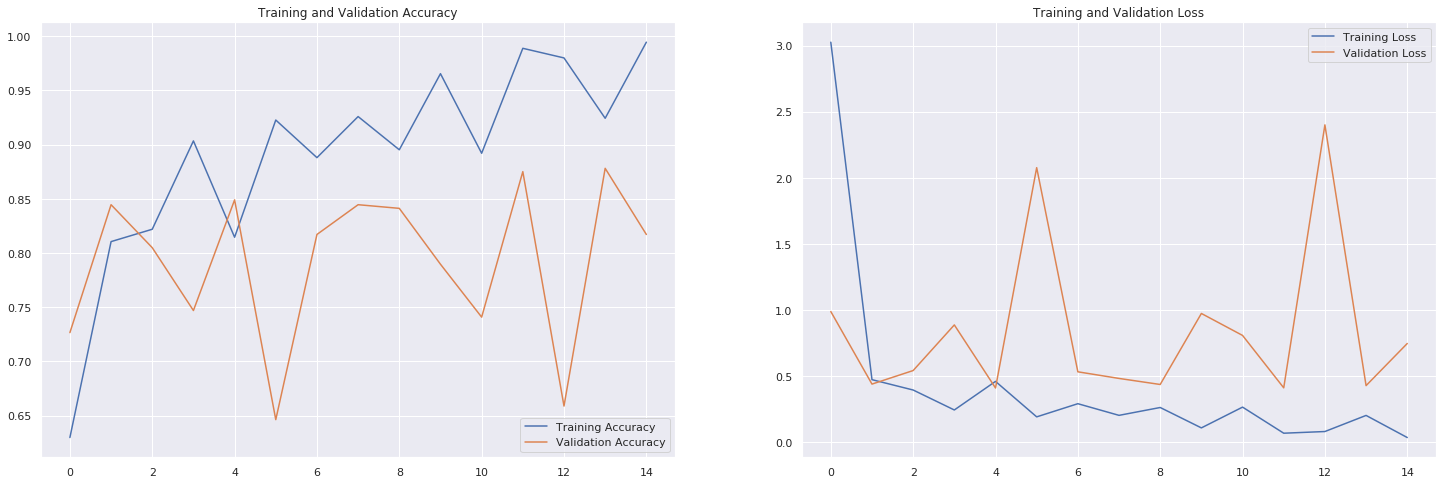

In [530]:
acc = history_DN121.history['acc']
val_acc = history_DN121.history['val_acc']

loss = history_DN121.history['loss']
val_loss = history_DN121.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Evaluation of DenseNet121 model accuracy on test data ##

### Let's compare how the model performs on the test dataset ###

In [531]:
test_loss, test_acc = model_DN121.evaluate_generator(test_data_gen, verbose=0)

In [532]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8201754365051002


In [533]:
print('\nTest loss:', test_loss)


Test loss: 0.6015439305389136


## Make predictions on test data ##

### Let's make predictions on some images ###

In [534]:
test_data_gen.class_indices

{'damaged': 0, 'undamaged': 1}

In [535]:
predictions = model_DN121.predict_generator(test_data_gen)

In [536]:
true_labels = test_data_gen.classes

In [537]:
predictions[0]

array([0.9516491 , 0.04835083], dtype=float32)

In [538]:
np.argmax(predictions[0])

0

In [539]:
test_data_gen.classes[0]

0

In [540]:
predictions[-1]

array([3.1954583e-04, 9.9968052e-01], dtype=float32)

In [541]:
np.argmax(predictions[-1])

1

In [542]:
test_data_gen.classes[-1]

1

In [543]:
test_data_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Confusion Matrix ##

In [544]:
y_true = true_labels
y_pred = np.array([np.argmax(x) for x in predictions])

In [545]:
y_pred

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,

In [546]:
cm = confusion_matrix(y_true, y_pred)

In [547]:
print(cm)

[[197  77]
 [133  49]]


## Confusion Matrix Heat Map ##

In [548]:
#!pip install seaborn

In [549]:
#import seaborn as sb

In [550]:
#heat_map = sb.heatmap(cm, annot=True)
#sb.set(font_scale=1)
#plt.show()

## Classification report of DenseNet121 on test set ##

In [551]:
from sklearn.metrics import classification_report

In [552]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.72      0.65       274
           1       0.39      0.27      0.32       182

    accuracy                           0.54       456
   macro avg       0.49      0.49      0.49       456
weighted avg       0.51      0.54      0.52       456



## NASNetLarge Pre-trained model ##

In [553]:
from keras.applications.nasnet import NASNetLarge
from keras.preprocessing import image
from keras.applications.nasnet import preprocess_input

In [554]:
base_model = NASNetLarge(weights='imagenet', include_top=False)

343613440/343610240 [==============================] - 80s 0us/step


In [555]:
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(2, activation='softmax')(x)

# this is the model we will train
model_NasNet = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model_NasNet.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [564]:
history_NasNet = model_NasNet.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=10,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/10
10/10 [==============================] - 517s 52s/step - loss: 0.2961 - acc: 0.8798 - val_loss: 0.6444 - val_acc: 0.8099
Epoch 2/10
10/10 [==============================] - 499s 50s/step - loss: 0.1396 - acc: 0.9460 - val_loss: 0.9496 - val_acc: 0.7774
Epoch 3/10
10/10 [==============================] - 505s 51s/step - loss: 0.2823 - acc: 0.8957 - val_loss: 0.6391 - val_acc: 0.8018
Epoch 4/10
10/10 [==============================] - 498s 50s/step - loss: 0.1208 - acc: 0.9517 - val_loss: 1.7142 - val_acc: 0.6982
Epoch 5/10
10/10 [==============================] - 531s 53s/step - loss: 0.2590 - acc: 0.8906 - val_loss: 0.6809 - val_acc: 0.8125
Epoch 6/10
10/10 [==============================] - 503s 50s/step - loss: 0.2026 - acc: 0.9104 - val_loss: 0.4643 - val_acc: 0.8720
Epoch 7/10
10/10 [==============================] - 502s 50s/step - loss: 0.0891 - acc: 0.9683 - val_loss: 0.7761 - val_acc: 0.8232
Epoch 8/10
10/10 [==============================] - 518s 52s/step - loss: 0.

In [588]:
# Save the entire model to a HDF5 file
model_NasNet.save('NasNet/NasNet_model.h5')


## Visualize NasNetLarge model ##

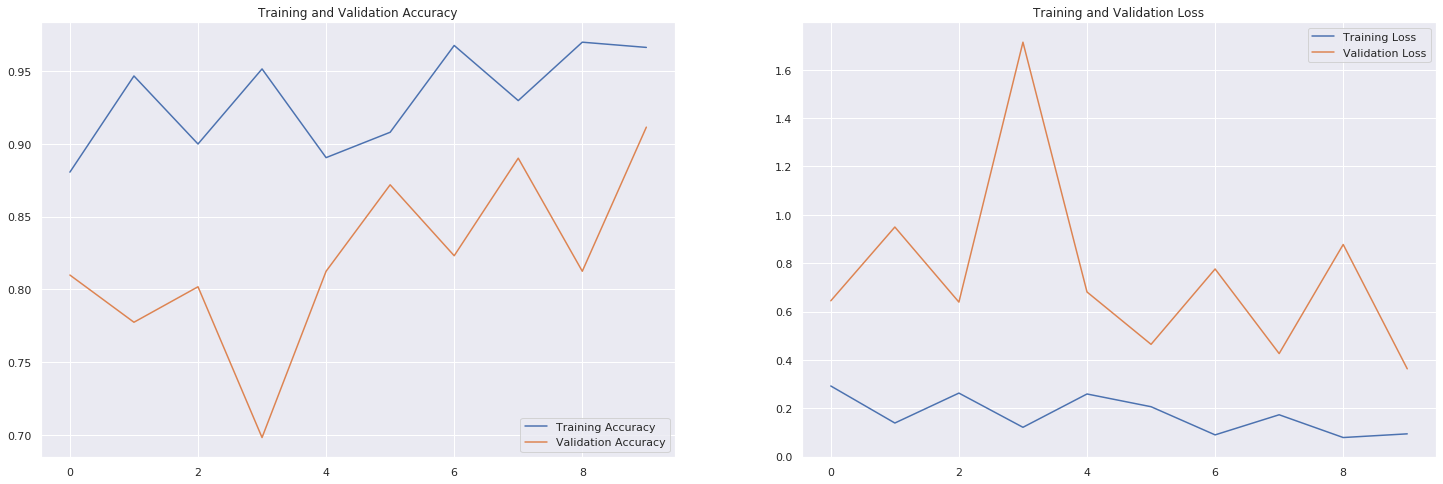

In [565]:
acc = history_NasNet.history['acc']
val_acc = history_NasNet.history['val_acc']

loss = history_NasNet.history['loss']
val_loss = history_NasNet.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Evaluation of NasNet model accuracy on test data ##

### Let's compare how the model performs on the test dataset ###

In [566]:
test_loss, test_acc = model_NasNet.evaluate_generator(test_data_gen, verbose=0)

In [567]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.9013157926107708


In [568]:
print('\nTest loss:', test_loss)


Test loss: 0.36685853987409356


## Make predictions on test data ##

### Let's make predictions on some images ###

In [569]:
test_data_gen.class_indices

{'damaged': 0, 'undamaged': 1}

In [570]:
predictions = model_NasNet.predict_generator(test_data_gen)

In [571]:
true_labels = test_data_gen.classes

In [572]:
predictions[0]

array([9.9999964e-01, 4.0678330e-07], dtype=float32)

In [573]:
np.argmax(predictions[0])

0

In [574]:
test_data_gen.classes[0]

0

In [575]:
predictions[-1]

array([0.7423542, 0.2576458], dtype=float32)

In [576]:
np.argmax(predictions[-1])

0

In [577]:
test_data_gen.classes[-1]

1

In [578]:
test_data_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Confusion Matrix ##

In [579]:
y_true = true_labels
y_pred = np.array([np.argmax(x) for x in predictions])

In [580]:
y_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,

In [581]:
cm = confusion_matrix(y_true, y_pred)

In [582]:
print(cm)

[[171 103]
 [108  74]]


## Confusion Matrix Heat Map ##

In [583]:
#!pip install seaborn

In [584]:
#import seaborn as sb

In [585]:
#heat_map = sb.heatmap(cm, annot=True)
#sb.set(font_scale=1)
#plt.show()

## Classification report of NasNet on test set ##

In [586]:
from sklearn.metrics import classification_report

In [587]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.62      0.62       274
           1       0.42      0.41      0.41       182

    accuracy                           0.54       456
   macro avg       0.52      0.52      0.52       456
weighted avg       0.54      0.54      0.54       456



## Xception Pre-trained model ##

In [593]:
from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.applications.xception import preprocess_input

In [594]:
base_model = Xception(weights='imagenet', include_top=False)

83689472/83683744 [==============================] - 17s 0us/step


In [595]:
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(2, activation='softmax')(x)

# this is the model we will train
model_Xception = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model_Xception.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [596]:
history_Xception = model_Xception.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=10,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/10
10/10 [==============================] - 233s 23s/step - loss: 1.9210 - acc: 0.6241 - val_loss: 0.8617 - val_acc: 0.6510
Epoch 2/10
10/10 [==============================] - 199s 20s/step - loss: 0.4618 - acc: 0.7855 - val_loss: 0.3423 - val_acc: 0.8415
Epoch 3/10
10/10 [==============================] - 196s 20s/step - loss: 0.2882 - acc: 0.8902 - val_loss: 0.8972 - val_acc: 0.7104
Epoch 4/10
10/10 [==============================] - 197s 20s/step - loss: 0.3700 - acc: 0.8465 - val_loss: 0.4206 - val_acc: 0.8232
Epoch 5/10
10/10 [==============================] - 213s 21s/step - loss: 0.3708 - acc: 0.8328 - val_loss: 0.5074 - val_acc: 0.8021
Epoch 6/10
10/10 [==============================] - 201s 20s/step - loss: 0.3093 - acc: 0.8699 - val_loss: 0.4438 - val_acc: 0.8354
Epoch 7/10
10/10 [==============================] - 200s 20s/step - loss: 0.2800 - acc: 0.8918 - val_loss: 0.6427 - val_acc: 0.7927
Epoch 8/10
10/10 [==============================] - 206s 21s/step - loss: 0.

In [620]:
# Save the entire model to a HDF5 file
model_Xception.save('Xception/Xception_model.h5')


## Visualize Xception model ##

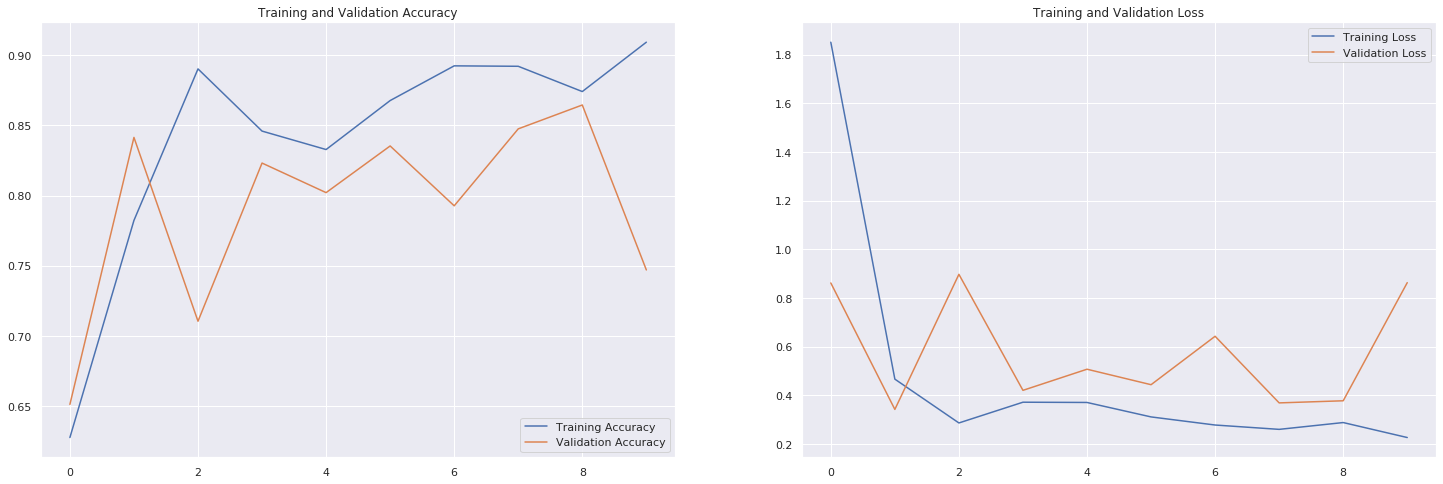

In [597]:
acc = history_Xception.history['acc']
val_acc = history_Xception.history['val_acc']

loss = history_Xception.history['loss']
val_loss = history_Xception.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Evaluation of Xception model accuracy on test data ##

### Let's compare how the model performs on the test dataset ###

In [598]:
test_loss, test_acc = model_Xception.evaluate_generator(test_data_gen, verbose=0)

In [599]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.7587719319159525


In [600]:
print('\nTest loss:', test_loss)


Test loss: 0.7947950906920851


## Make predictions on test data ##

### Let's make predictions on some images ###

In [601]:
test_data_gen.class_indices

{'damaged': 0, 'undamaged': 1}

In [602]:
predictions = model_Xception.predict_generator(test_data_gen)

In [603]:
true_labels = test_data_gen.classes

In [604]:
predictions[0]

array([0.9351917 , 0.06480826], dtype=float32)

In [605]:
np.argmax(predictions[0])

0

In [606]:
test_data_gen.classes[0]

0

In [607]:
predictions[-1]

array([0.97656065, 0.02343936], dtype=float32)

In [608]:
np.argmax(predictions[-1])

0

In [609]:
test_data_gen.classes[-1]

1

In [610]:
test_data_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Confusion Matrix ##

In [611]:
y_true = true_labels
y_pred = np.array([np.argmax(x) for x in predictions])

In [612]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [613]:
cm = confusion_matrix(y_true, y_pred)

In [614]:
print(cm)

[[227  47]
 [155  27]]


## Confusion Matrix Heat Map ##

In [615]:
#!pip install seaborn

In [616]:
#import seaborn as sb

In [617]:
#heat_map = sb.heatmap(cm, annot=True)
#sb.set(font_scale=1)
#plt.show()

## Classification report of NasNet on test set ##

In [618]:
from sklearn.metrics import classification_report

In [619]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.83      0.69       274
           1       0.36      0.15      0.21       182

    accuracy                           0.56       456
   macro avg       0.48      0.49      0.45       456
weighted avg       0.50      0.56      0.50       456

